In [1]:
!pip install xgboost

Import Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer


Load the Dataset

In [4]:
data = pd.read_csv("creditcard.csv")

Data Preprocessing


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

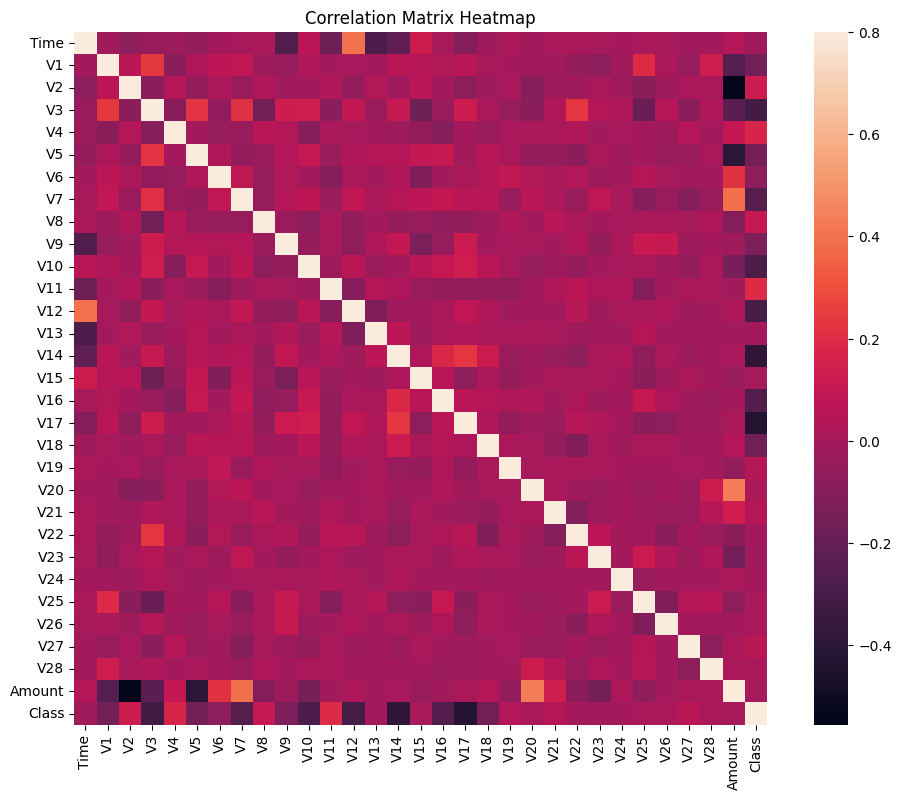

In [5]:
# Basic Info
print(data.head())
print(data.describe())

# Fraud vs Valid
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud) / float(len(valid))
print("Fraud Ratio:", outlierFraction)
print(f"Fraud Cases: {len(fraud)}")
print(f"Valid Transactions: {len(valid)}")

# Amount details of fraudulent transactions:
print("\nAmount details of fraudulent transactions:")
print(fraud.Amount.describe())

# Amount details of valid transactions:
print("\nAmount details of valid transactions:")
print(valid.Amount.describe())

# Heatmap of Correlation
plt.figure(figsize=(12, 9))
sns.heatmap(data.corr(), vmax=0.8, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


Handling Missing Values

In [6]:
data = data.dropna(subset=['Class'])
X = data.drop(['Class'], axis=1)
Y = data['Class']

xData = X.values
yData = Y.values

xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.2, random_state=42)

# Impute yTest (if needed)
print("NaN values in yTest before imputation:", np.isnan(yTest).sum())
imputer = SimpleImputer(strategy='most_frequent')
yTest = imputer.fit_transform(yTest.reshape(-1, 1)).flatten()
print("NaN values in yTest after imputation:", np.isnan(yTest).sum())


NaN values in yTest before imputation: 0
NaN values in yTest after imputation: 0


Define Models

In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolors='k')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', lw=2)  # identity line
    plt.xlabel("Actual Label")
    plt.ylabel("Predicted Label")
    plt.title(title)
    plt.grid(True)
    plt.show()


In [27]:
def plot_actual_vs_predicted_proba(y_true, y_proba, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_proba, alpha=0.6, edgecolors='k')
    plt.plot([0, 1], [0, 1], 'r--', lw=2)  # Identity line
    plt.xlabel("Actual Label")
    plt.ylabel("Predicted Probability of Fraud")
    plt.title(title)
    plt.grid(True)
    plt.show()


 Evaluating Model for Logistic Regression


In [8]:
# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(xTrain, yTrain)
yPred_logreg = logreg.predict(xTest)

# Evaluate Logistic Regression
accuracy_logreg = accuracy_score(yTest, yPred_logreg)
precision_logreg = precision_score(yTest, yPred_logreg)
recall_logreg = recall_score(yTest, yPred_logreg)
f1_logreg = f1_score(yTest, yPred_logreg)

print(f"Logistic Regression - Accuracy: {accuracy_logreg:.4f}")
print(f"Logistic Regression - Precision: {precision_logreg:.4f}")
print(f"Logistic Regression - Recall: {recall_logreg:.4f}")
print(f"Logistic Regression - F1-Score: {f1_logreg:.4f}")
print("Classification Report:")
print(classification_report(yTest, yPred_logreg, target_names=['Normal', 'Fraud']))


Logistic Regression - Accuracy: 0.9988
Logistic Regression - Precision: 0.8276
Logistic Regression - Recall: 0.5714
Logistic Regression - F1-Score: 0.6761
Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     18594
       Fraud       0.83      0.57      0.68        42

    accuracy                           1.00     18636
   macro avg       0.91      0.79      0.84     18636
weighted avg       1.00      1.00      1.00     18636



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


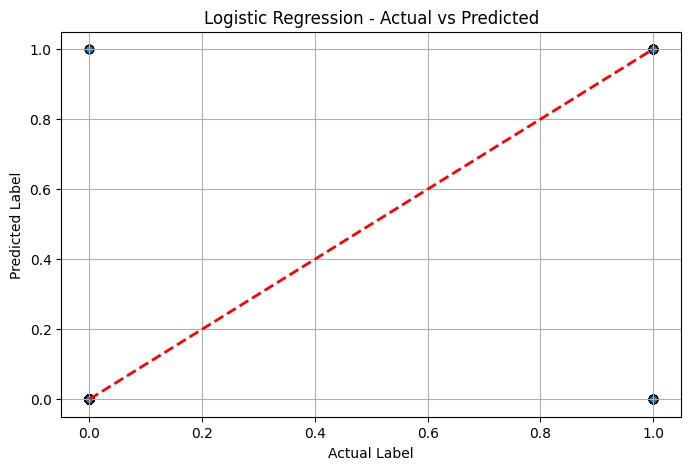

In [19]:
plot_actual_vs_predicted(yTest, yPred_logreg, "Logistic Regression - Actual vs Predicted")



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


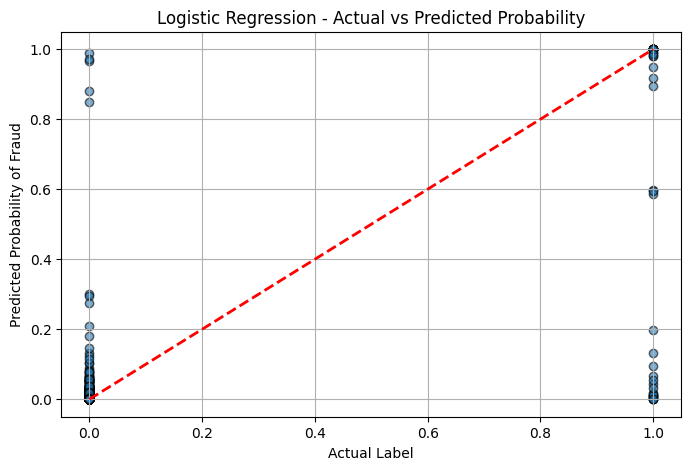

In [28]:
model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(xTrain, yTrain)
y_proba_logreg = model_logreg.predict_proba(xTest)[:, 1]
plot_actual_vs_predicted_proba(yTest, y_proba_logreg, "Logistic Regression - Actual vs Predicted Probability")


Evaluating Model for Random Forest

In [10]:
# Random Forest Model
rf = RandomForestClassifier()
rf.fit(xTrain, yTrain)
yPred_rf = rf.predict(xTest)

# Evaluate Random Forest
accuracy_rf = accuracy_score(yTest, yPred_rf)
precision_rf = precision_score(yTest, yPred_rf)
recall_rf = recall_score(yTest, yPred_rf)
f1_rf = f1_score(yTest, yPred_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - Precision: {precision_rf:.4f}")
print(f"Random Forest - Recall: {recall_rf:.4f}")
print(f"Random Forest - F1-Score: {f1_rf:.4f}")
print("Classification Report:")
print(classification_report(yTest, yPred_rf, target_names=['Normal', 'Fraud']))


Random Forest - Accuracy: 0.9994
Random Forest - Precision: 0.9697
Random Forest - Recall: 0.7619
Random Forest - F1-Score: 0.8533
Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     18594
       Fraud       0.97      0.76      0.85        42

    accuracy                           1.00     18636
   macro avg       0.98      0.88      0.93     18636
weighted avg       1.00      1.00      1.00     18636



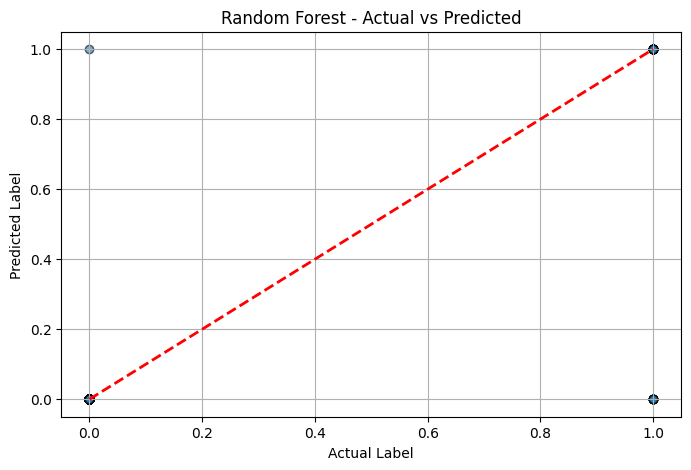

In [20]:
plot_actual_vs_predicted(yTest, yPred_rf, "Random Forest - Actual vs Predicted")


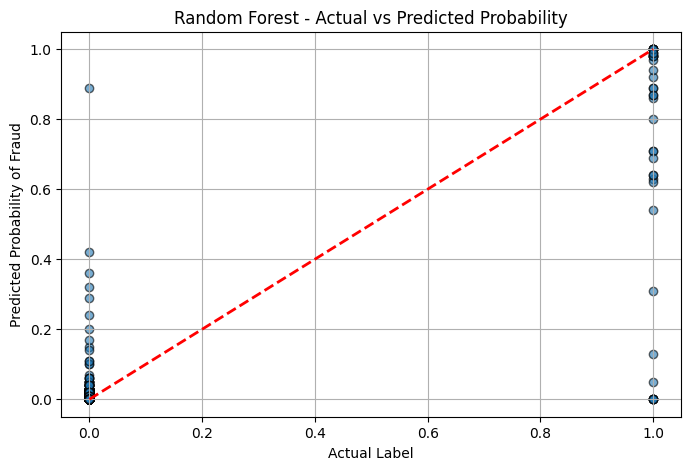

In [29]:
model_rf = RandomForestClassifier()
model_rf.fit(xTrain, yTrain)
y_proba_rf = model_rf.predict_proba(xTest)[:, 1]
plot_actual_vs_predicted_proba(yTest, y_proba_rf, "Random Forest - Actual vs Predicted Probability")


Support Vector Machine

In [12]:
# SVM Model
svm = SVC()
svm.fit(xTrain, yTrain)
yPred_svm = svm.predict(xTest)

# Evaluate SVM
accuracy_svm = accuracy_score(yTest, yPred_svm)
precision_svm = precision_score(yTest, yPred_svm)
recall_svm = recall_score(yTest, yPred_svm)
f1_svm = f1_score(yTest, yPred_svm)

print(f"SVM - Accuracy: {accuracy_svm:.4f}")
print(f"SVM - Precision: {precision_svm:.4f}")
print(f"SVM - Recall: {recall_svm:.4f}")
print(f"SVM - F1-Score: {f1_svm:.4f}")
print("Classification Report:")
print(classification_report(yTest, yPred_svm, target_names=['Normal', 'Fraud']))


SVM - Accuracy: 0.9977
SVM - Precision: 0.0000
SVM - Recall: 0.0000
SVM - F1-Score: 0.0000
Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     18594
       Fraud       0.00      0.00      0.00        42

    accuracy                           1.00     18636
   macro avg       0.50      0.50      0.50     18636
weighted avg       1.00      1.00      1.00     18636



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

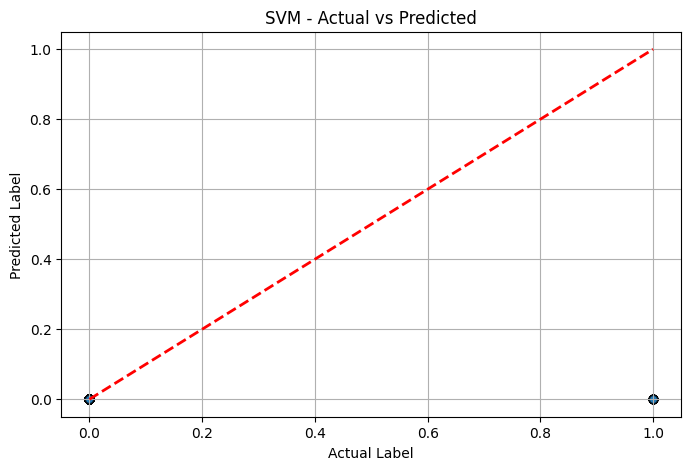

In [21]:
plot_actual_vs_predicted(yTest, yPred_svm, "SVM - Actual vs Predicted")


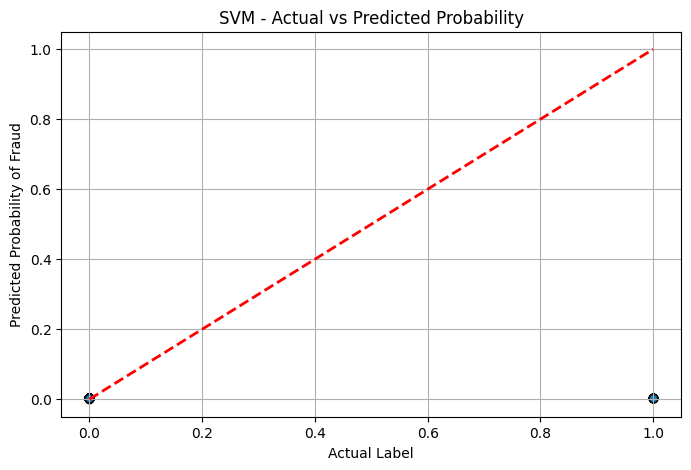

In [30]:
model_svm = SVC(probability=True)
model_svm.fit(xTrain, yTrain)
y_proba_svm = model_svm.predict_proba(xTest)[:, 1]
plot_actual_vs_predicted_proba(yTest, y_proba_svm, "SVM - Actual vs Predicted Probability")


XGBoost

In [14]:
# XGBoost Model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(xTrain, yTrain)
yPred_xgb = xgb.predict(xTest)

# Evaluate XGBoost
accuracy_xgb = accuracy_score(yTest, yPred_xgb)
precision_xgb = precision_score(yTest, yPred_xgb)
recall_xgb = recall_score(yTest, yPred_xgb)
f1_xgb = f1_score(yTest, yPred_xgb)

print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost - Precision: {precision_xgb:.4f}")
print(f"XGBoost - Recall: {recall_xgb:.4f}")
print(f"XGBoost - F1-Score: {f1_xgb:.4f}")
print("Classification Report:")
print(classification_report(yTest, yPred_xgb, target_names=['Normal', 'Fraud']))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:28:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.9995
XGBoost - Precision: 0.9706
XGBoost - Recall: 0.7857
XGBoost - F1-Score: 0.8684
Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     18594
       Fraud       0.97      0.79      0.87        42

    accuracy                           1.00     18636
   macro avg       0.99      0.89      0.93     18636
weighted avg       1.00      1.00      1.00     18636



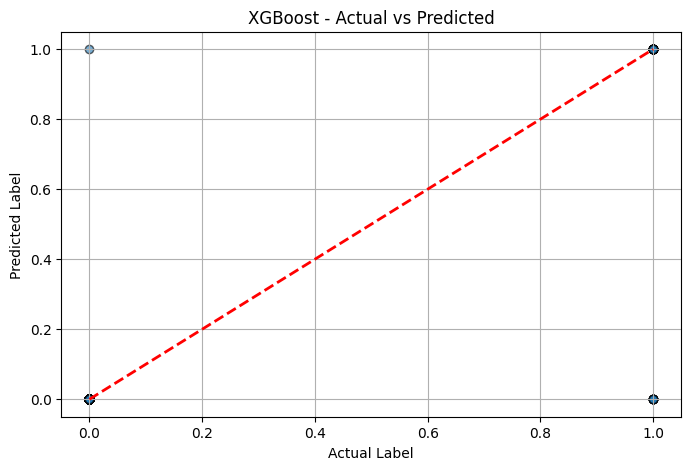

In [23]:
plot_actual_vs_predicted(yTest, yPred_xgb, "XGBoost - Actual vs Predicted")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:42:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


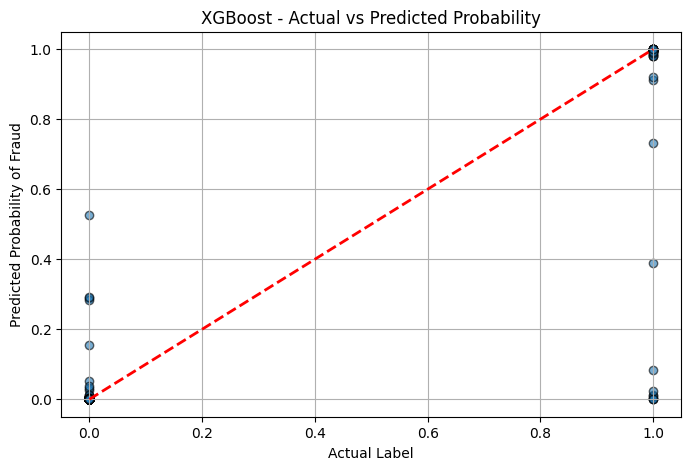

In [31]:
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(xTrain, yTrain)
y_proba_xgb = model_xgb.predict_proba(xTest)[:, 1]
plot_actual_vs_predicted_proba(yTest, y_proba_xgb, "XGBoost - Actual vs Predicted Probability")


In [32]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
from xgboost import XGBClassifier
from sklearn.datasets import make_classification

# Generate a sample classification dataset (you can replace this with your own dataset)
X, y = make_classification(n_samples=18636, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier()
}

# Function to calculate MAE, MSE, and R² for each model
results = []
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results.append({
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'R² Score': r2
    })

# Create a DataFrame for easy visualization
results_df = pd.DataFrame(results)

# Rank the models based on R² Score (higher is better) and MAE/MSE (lower is better)
results_df['Rank'] = results_df['R² Score'].rank(ascending=False) + results_df[['MAE', 'MSE']].rank(ascending=True).mean(axis=1)
results_df = results_df.sort_values(by=['Rank'])

# Show the results
print("Model Evaluation Results:")
print(results_df[['Model', 'MAE', 'MSE', 'R² Score', 'Rank']])



Model Evaluation Results:
                 Model       MAE       MSE  R² Score  Rank
2                  SVM  0.033798  0.033798  0.864806   2.0
3              XGBoost  0.039968  0.039968  0.840128   4.0
1        Random Forest  0.048015  0.048015  0.807939   6.0
0  Logistic Regression  0.219689  0.219689  0.121238   8.0


In [33]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
from xgboost import XGBClassifier
from sklearn.datasets import make_classification

# Generate a sample classification dataset (you can replace this with your own dataset)
X, y = make_classification(n_samples=18636, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier()
}

# Function to calculate MAE, MSE, and R² for each model
results = []
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results.append({
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'R² Score': r2
    })

# Create a DataFrame for easy visualization
results_df = pd.DataFrame(results)

# Rank the models based on their performance (lower MAE and MSE, higher R² Score)
# Assigning lower MAE/MSE as better, higher R² Score as better
results_df['Rank MAE'] = results_df['MAE'].rank(ascending=True)  # Lower MAE is better
results_df['Rank MSE'] = results_df['MSE'].rank(ascending=True)  # Lower MSE is better
results_df['Rank R²'] = results_df['R² Score'].rank(ascending=False)  # Higher R² is better

# Calculate a combined ranking score based on the individual metrics
results_df['Total Rank'] = results_df[['Rank MAE', 'Rank MSE', 'Rank R²']].mean(axis=1)

# Sort the models based on the combined rank
results_df = results_df.sort_values(by='Total Rank')

# Show the results
print("Model Evaluation Results:")
print(results_df[['Model', 'MAE', 'MSE', 'R² Score', 'Total Rank']])



Model Evaluation Results:
                 Model       MAE       MSE  R² Score  Total Rank
2                  SVM  0.033798  0.033798  0.864806         1.0
3              XGBoost  0.039968  0.039968  0.840128         2.0
1        Random Forest  0.046942  0.046942  0.812230         3.0
0  Logistic Regression  0.219689  0.219689  0.121238         4.0
